In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load data
df=pd.read_csv("marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [6]:
# Check duplicates in user_id
df.duplicated(subset="user id").sum()

0

In [8]:
# Drop unwanted columns
df.drop(["Unnamed: 0","user id"], axis=1,inplace=True)

In [9]:
df.columns

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')

In [12]:
df.dtypes

test group       object
converted          bool
total ads         int64
most ads day     object
most ads hour     int64
dtype: object

In [13]:
# Check catagorical variables
df_cat=df[['test group', 'converted',  'most ads day',
       'most ads hour']]
df_cat.nunique()

test group        2
converted         2
most ads day      7
most ads hour    24
dtype: int64

In [14]:
for i in df_cat.columns:
    print(i,":",df_cat[i].unique())


test group : ['ad' 'psa']
converted : [False  True]
most ads day : ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
most ads hour : [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


### Univariate analysis

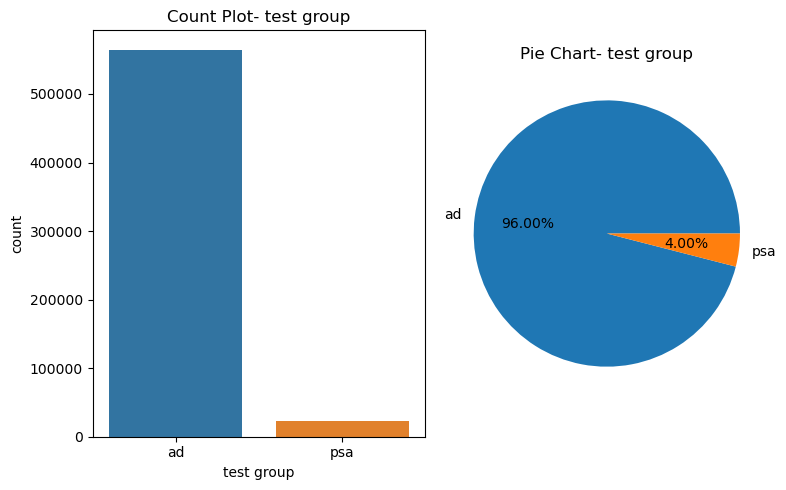

In [40]:
variable="test group"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart- {variable}')

plt.tight_layout()
plt.show()

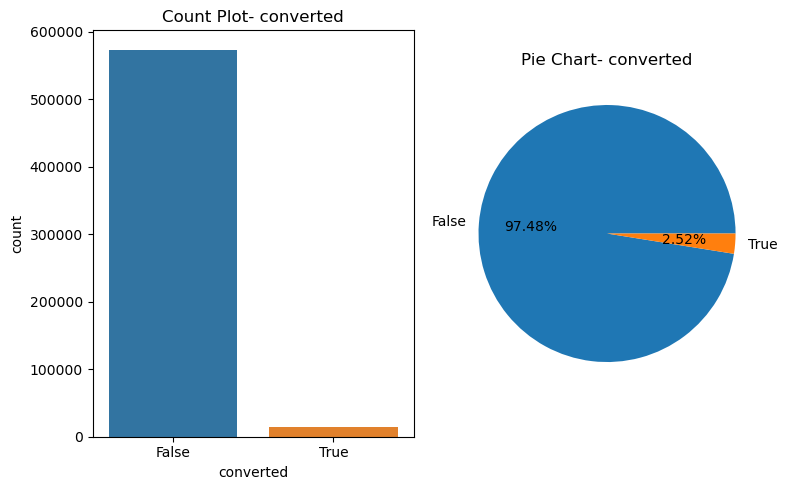

In [39]:
variable="converted"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat)
plt.title(f'Count Plot- {variable}')

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart- {variable}')

plt.tight_layout()
plt.show()

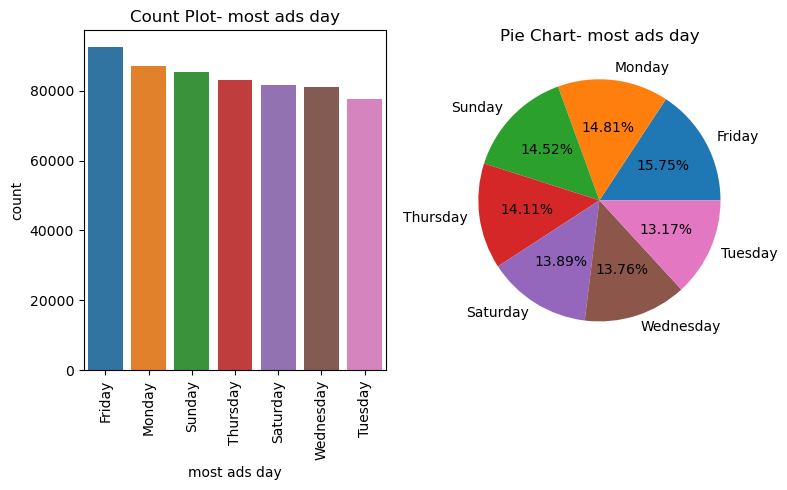

In [38]:
variable="most ads day"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat["most ads day"].value_counts().index)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart- {variable}')

plt.tight_layout()
plt.show()

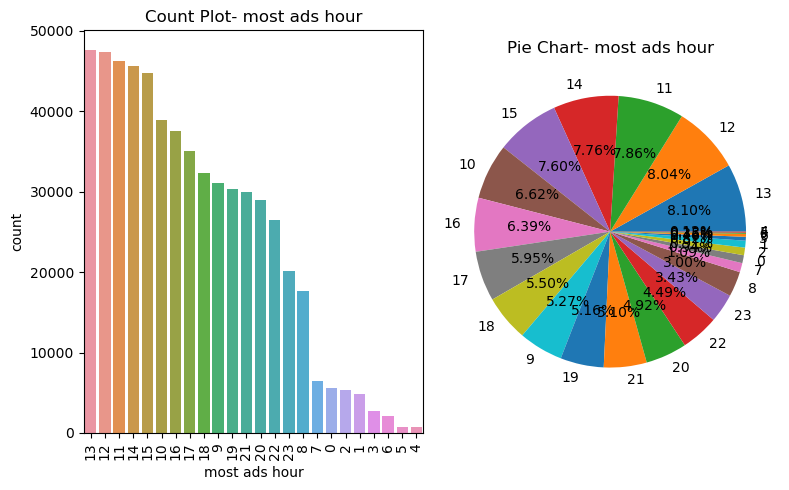

In [37]:
variable="most ads hour"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.countplot(x=variable,data=df_cat,order=df_cat["most ads hour"].value_counts().index)
plt.title(f'Count Plot- {variable}')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
counts=df_cat[variable].value_counts()
plt.pie(counts,labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart- {variable}')

plt.tight_layout()
plt.show()

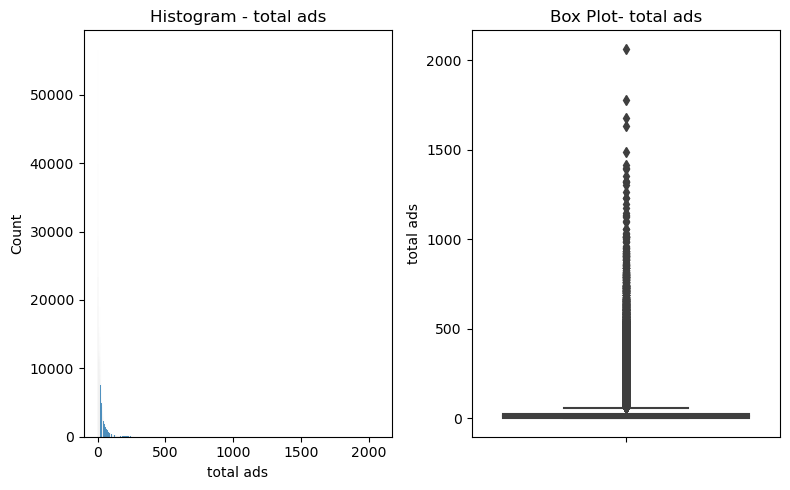

In [46]:
variable="total ads"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df)
plt.title(f'Histogram - {variable}')


plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df)
plt.title(f'Box Plot- {variable}')

plt.tight_layout()
plt.show()

In [50]:
df["total ads"].describe()

count    588101.000000
mean         24.820876
std          43.715181
min           1.000000
25%           4.000000
50%          13.000000
75%          27.000000
max        2065.000000
Name: total ads, dtype: float64

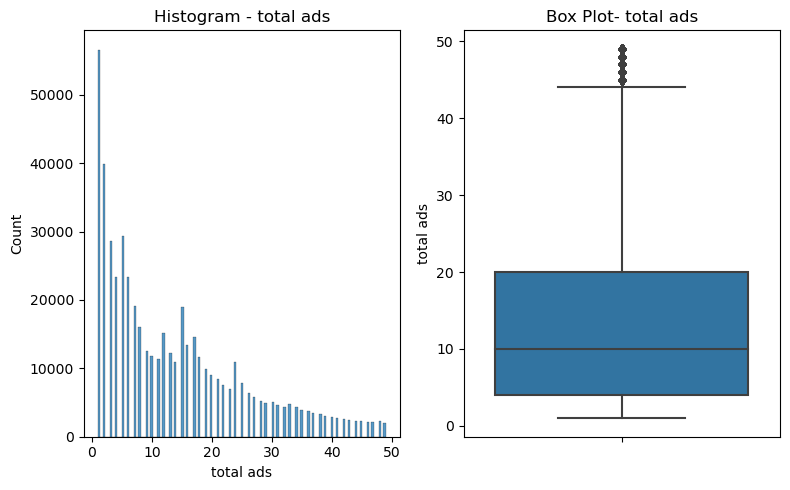

In [51]:
variable="total ads"

plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
sns.histplot(x=variable,data=df[df["total ads"]<50])
plt.title(f'Histogram - {variable}')


plt.subplot(1,2,2)
sns.boxplot(y=variable,data=df[df["total ads"]<50])
plt.title(f'Box Plot- {variable}')

plt.tight_layout()
plt.show()

### Bivariate analysis

In [52]:
# Create a crosstab for the stacked bar chart
crosstab_test_group = pd.crosstab(df_cat['test group'], df_cat['converted'], normalize='index')

crosstab_test_group

converted,False,True
test group,,
ad,0.974453,0.025547
psa,0.982146,0.017854


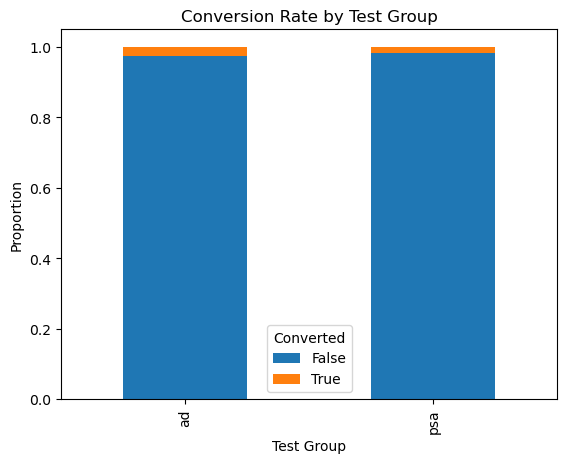

In [53]:

crosstab_test_group.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Proportion')
plt.legend(title='Converted')
plt.show()

In [55]:
crosstab_most_ads_day = pd.crosstab(df_cat['most ads day'], df_cat['converted'], normalize='index')
crosstab_most_ads_day.sort_values(by=True,ascending=False)

converted,False,True
most ads day,,
Monday,0.967188,0.032812
Tuesday,0.970160,0.029840
Wednesday,0.975058,0.024942
Sunday,0.975524,0.024476
Friday,0.977788,0.022212
Thursday,0.978429,0.021571
Saturday,0.978949,0.021051


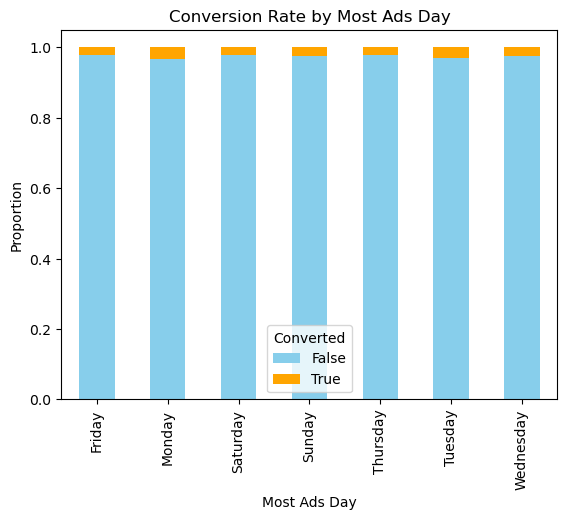

In [56]:
crosstab_most_ads_day.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Conversion Rate by Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Proportion')
plt.legend(title='Converted')
plt.show()

In [58]:
crosstab_most_ads_hour = pd.crosstab(df_cat['most ads hour'], df_cat['converted'], normalize='index')
crosstab_most_ads_hour.sort_values(by=True,ascending=False)

converted,False,True
most ads hour,,
16,0.969228,0.030772
20,0.970197,0.029803
15,0.970347,0.029653
21,0.971077,0.028923
17,0.971790,0.028210
14,0.971937,0.028063
18,0.972620,0.027380
19,0.973280,0.026720
22,0.973895,0.026105


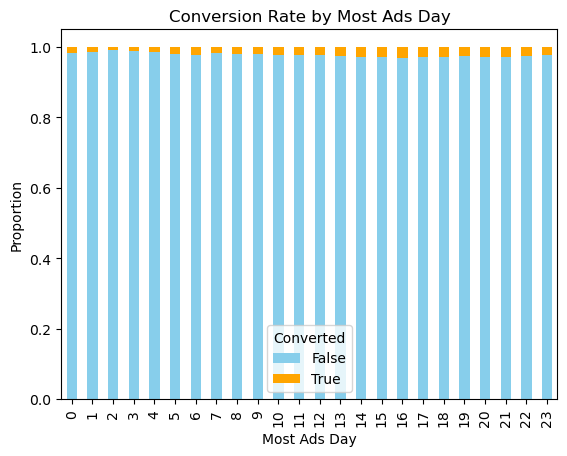

In [59]:
crosstab_most_ads_hour.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title('Conversion Rate by Most Ads Day')
plt.xlabel('Most Ads Day')
plt.ylabel('Proportion')
plt.legend(title='Converted')
plt.show()

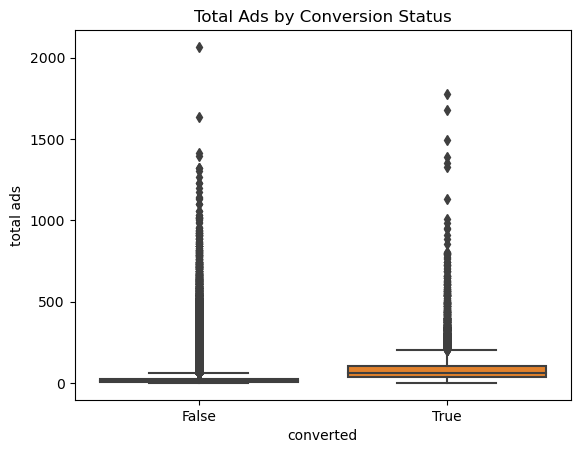

In [61]:
ax = sns.boxplot(x='converted', y='total ads', data=df)
plt.title('Total Ads by Conversion Status')
plt.show()

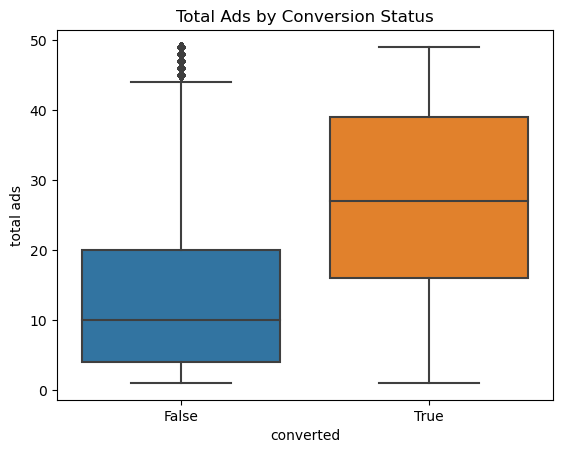

In [62]:
ax = sns.boxplot(x='converted', y='total ads', data=df[df["total ads"]<50])
plt.title('Total Ads by Conversion Status')
plt.show()

### Statistical Test

#### 1. Chi-Square Test: converted vs. test group

In [66]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_cat['test group'], df_cat['converted'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test:\nChi2 Value: {chi2}\nP-value: {p}\n')

if p < 0.05:
    print("The test is statistically significant.")
else:
    print("The test is not statistically significant.")


Chi-Square Test:
Chi2 Value: 54.005823883685245
P-value: 1.9989623063390075e-13

The test is statistically significant.


#### 2. Chi-Square Test: converted vs. most ads day

In [67]:
# Create a contingency table
contingency_table = pd.crosstab(df_cat['most ads day'], df_cat['converted'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test:\nChi2 Value: {chi2}\nP-value: {p}\n')

if p < 0.05:
    print("The test is statistically significant.")
else:
    print("The test is not statistically significant.")


Chi-Square Test:
Chi2 Value: 410.0478857936585
P-value: 1.932184379244731e-85

The test is statistically significant.


In [68]:
# Create a contingency table
contingency_table = pd.crosstab(df_cat['most ads hour'], df_cat['converted'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-Square Test:\nChi2 Value: {chi2}\nP-value: {p}\n')

if p < 0.05:
    print("The test is statistically significant.")
else:
    print("The test is not statistically significant.")

Chi-Square Test:
Chi2 Value: 430.76869230822086
P-value: 8.027629823696771e-77

The test is statistically significant.


### 3. T-Test / Mann-Whitney U Test: converted vs. total ads

In [75]:
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

# Separate the data into two groups
group1 = df_cat[df_cat['converted'] == True]['most ads hour']
group2 = df_cat[df_cat['converted'] == False]['most ads hour']

# Check for normality (Shapiro-Wilk test)
shapiro_test1 = shapiro(group1)
shapiro_test2 = shapiro(group2)

print(f'Shapiro-Wilk Test for Group 1 (Converted = True): {shapiro_test1}')
print(f'Shapiro-Wilk Test for Group 2 (Converted = False): {shapiro_test2}')

# If the p-value is > 0.05, we assume normality
if shapiro_test1.pvalue > 0.05 and shapiro_test2.pvalue > 0.05:
    # Perform T-Test
    t_stat, p_value = ttest_ind(group1, group2)
    print(f'T-Test:\nT-Statistic: {t_stat}\nP-value: {p_value}\n')
else:
    # Perform Mann-Whitney U Test
    u_stat, p_value = mannwhitneyu(group1, group2)
    print(f'Mann-Whitney U Test:\nU-Statistic: {u_stat}\nP-value: {p_value}\n')

# Check for statistical significance
if p_value < 0.05:
    print("The test is statistically significant.")
else:
    print("The test is not statistically significant.")


Shapiro-Wilk Test for Group 1 (Converted = True): ShapiroResult(statistic=0.9727128744125366, pvalue=0.0)
Shapiro-Wilk Test for Group 2 (Converted = False): ShapiroResult(statistic=0.9700084328651428, pvalue=0.0)
Mann-Whitney U Test:
U-Statistic: 4558293450.0
P-value: 2.8254109373735043e-50

The test is statistically significant.
